# 神經網路實做

## 拿取加權指數資料

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import weatherdataprocesstool as wt

twii=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/RM_Price/rawMaterialPrice.pickle')
twii=twii.loc['cmeCorn','Close'].loc["1961-08-10":]
twii

Date
1961-08-10    111.40
1961-08-11    111.40
1961-08-14    112.30
1961-08-15    112.50
1961-08-16    112.20
1961-08-17    112.00
1961-08-18    112.10
1961-08-21    111.60
1961-08-22    111.70
1961-08-23    112.00
1961-08-24    112.20
1961-08-25    112.40
1961-08-28    111.50
1961-08-29    110.40
1961-08-30    110.00
1961-08-31    109.10
1961-09-01    108.50
1961-09-05    108.20
1961-09-06    108.30
1961-09-07    108.40
1961-09-08    108.60
1961-09-11    108.50
1961-09-12    108.20
1961-09-13    109.00
1961-09-14    107.70
1961-09-15    106.50
1961-09-18    107.00
1961-09-19    107.20
1961-09-20    107.40
1961-09-21    111.20
               ...  
2019-06-20    450.00
2019-06-21    442.25
2019-06-24    451.75
2019-06-25    453.00
2019-06-26    449.50
2019-06-27    445.75
2019-06-28    424.75
2019-07-01    415.50
2019-07-02    419.00
2019-07-03    436.75
2019-07-05    438.75
2019-07-08    439.50
2019-07-09    432.50
2019-07-10    435.00
2019-07-11    444.25
2019-07-12    454.25
2019-07-

## 製作features

In [12]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])
dataset

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
Date,,,,,,,,,,,,,,,,,,,,,
1961-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007181
1961-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008977
1961-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992876
1961-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.981333
1961-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980392
1961-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974107
1961-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967886
1961-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969534
1961-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969561


## 簡單處理一下

In [3]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (14639, 43)
after dropping NaN (12711, 43)


## 神經網路Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,...,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,1.271100e+04,12711.000000
mean,1.857630e-15,2.503264e-16,-1.113206e-15,2.254270e-15,1.495612e-15,1.979892e-15,-5.694795e-18,-1.051616e-17,2.705028e-17,-1.310152e-18,...,8.235169e-16,-4.283324e-17,-9.118660e-18,-4.800049e-16,1.672104e-16,-1.958241e-16,-5.661605e-17,7.612159e-16,-7.285276e-16,1.002379
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,...,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,0.052290
min,-2.860470e+00,-2.944648e+00,-2.781495e+00,-2.637883e+00,-2.569553e+00,-2.473604e+00,-6.578022e+00,-2.392936e+00,-2.660721e+00,-2.601336e+00,...,-1.813006e+00,-5.288006e+00,-5.347104e+00,-1.556164e+00,-1.713234e+00,-1.851125e+00,-1.751792e+00,-2.117812e+00,-2.156364e+00,0.638686
25%,-6.294606e-01,-7.062674e-01,-6.726843e-01,-6.816832e-01,-6.936439e-01,-7.113903e-01,-4.471588e-01,-6.849413e-01,-6.998436e-01,-6.129408e-01,...,-6.498568e-01,-3.895610e-01,-4.371663e-01,-7.656340e-01,-8.086582e-01,-7.961064e-01,-9.287095e-01,-8.932088e-01,-6.764658e-01,0.975136
50%,-8.335920e-02,-1.305945e-01,-2.018661e-01,-2.121184e-01,-2.154728e-01,-2.235001e-01,1.846147e-03,-3.518840e-02,5.407129e-02,5.987692e-02,...,-1.983518e-01,8.027494e-03,1.650186e-02,-2.405424e-01,-6.757690e-02,-3.533145e-02,1.025383e-01,1.075170e-01,1.717664e-02,1.001616
75%,5.650684e-01,5.703268e-01,5.643850e-01,5.652879e-01,5.651337e-01,5.528684e-01,3.798789e-01,7.070817e-01,7.207970e-01,5.998053e-01,...,3.599259e-01,4.097949e-01,3.936124e-01,7.150160e-01,6.277700e-01,6.469162e-01,6.085315e-01,7.758811e-01,8.036567e-01,1.028759
max,4.644462e+00,5.048926e+00,5.996413e+00,6.257362e+00,6.321277e+00,6.362934e+00,4.308272e+00,2.484646e+00,2.348205e+00,2.529623e+00,...,6.074345e+00,6.197856e+00,3.652052e+00,3.629049e+00,3.947748e+00,2.946137e+00,2.271848e+00,1.988140e+00,2.067641e+00,1.788235


## 神經網路 Model

In [5]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape=(len(feature_names),)))
# model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
adam=keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=adam, loss="binary_crossentropy",metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________


## 神經網路訓練

In [6]:
dataset_scaled_train = dataset_scaled[:'2010']

get_best_model = keras.callbacks.ModelCheckpoint('nn.mdl', monitor='accuracy')
history=model.fit(dataset_scaled_train[feature_names], 
          dataset_scaled_train['return'] > 1, 
          batch_size=3000, epochs=200, validation_split=0.1, callbacks=[get_best_model])

Train on 9493 samples, validate on 1055 samples
Epoch 1/200
9493/9493 [==============================] - 0s 22us/step - loss: 0.7322 - acc: 0.5144 - val_loss: 0.7337 - val_acc: 0.5223
Epoch 2/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7315 - acc: 0.5137 - val_loss: 0.7319 - val_acc: 0.5223
Epoch 3/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7309 - acc: 0.5137 - val_loss: 0.7301 - val_acc: 0.5213
Epoch 4/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7303 - acc: 0.5141 - val_loss: 0.7284 - val_acc: 0.5251
Epoch 5/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7296 - acc: 0.5141 - val_loss: 0.7267 - val_acc: 0.5242
Epoch 6/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7290 - acc: 0.5151 - val_loss: 0.7250 - val_acc: 0.5261
Epoch 7/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7284 - acc: 0.5141 - val_loss: 0.7233 - val_acc: 0.5336
Epoch 

Epoch 61/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7094 - acc: 0.5119 - val_loss: 0.6809 - val_acc: 0.5915
Epoch 62/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7092 - acc: 0.5121 - val_loss: 0.6806 - val_acc: 0.5924
Epoch 63/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7090 - acc: 0.5120 - val_loss: 0.6804 - val_acc: 0.5953
Epoch 64/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7088 - acc: 0.5123 - val_loss: 0.6802 - val_acc: 0.5972
Epoch 65/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7087 - acc: 0.5123 - val_loss: 0.6801 - val_acc: 0.5934
Epoch 66/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7085 - acc: 0.5125 - val_loss: 0.6799 - val_acc: 0.5943
Epoch 67/200
9493/9493 [==============================] - 0s 1us/step - loss: 0.7084 - acc: 0.5130 - val_loss: 0.6798 - val_acc: 0.5934
Epoch 68/200
9493/9493 [========================

9493/9493 [==============================] - 0s 2us/step - loss: 0.7021 - acc: 0.5229 - val_loss: 0.6775 - val_acc: 0.5725
Epoch 122/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7020 - acc: 0.5235 - val_loss: 0.6775 - val_acc: 0.5725
Epoch 123/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7019 - acc: 0.5235 - val_loss: 0.6776 - val_acc: 0.5725
Epoch 124/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7018 - acc: 0.5236 - val_loss: 0.6776 - val_acc: 0.5706
Epoch 125/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7017 - acc: 0.5234 - val_loss: 0.6776 - val_acc: 0.5716
Epoch 126/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.7016 - acc: 0.5232 - val_loss: 0.6776 - val_acc: 0.5716
Epoch 127/200
9493/9493 [==============================] - 0s 1us/step - loss: 0.7015 - acc: 0.5238 - val_loss: 0.6777 - val_acc: 0.5706
Epoch 128/200
9493/9493 [==============================

Epoch 181/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6975 - acc: 0.5267 - val_loss: 0.6790 - val_acc: 0.5659
Epoch 182/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6975 - acc: 0.5264 - val_loss: 0.6790 - val_acc: 0.5659
Epoch 183/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6974 - acc: 0.5267 - val_loss: 0.6790 - val_acc: 0.5659
Epoch 184/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6973 - acc: 0.5268 - val_loss: 0.6790 - val_acc: 0.5640
Epoch 185/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6973 - acc: 0.5275 - val_loss: 0.6790 - val_acc: 0.5640
Epoch 186/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6972 - acc: 0.5274 - val_loss: 0.6790 - val_acc: 0.5640
Epoch 187/200
9493/9493 [==============================] - 0s 2us/step - loss: 0.6972 - acc: 0.5278 - val_loss: 0.6790 - val_acc: 0.5640
Epoch 188/200
9493/9493 [================

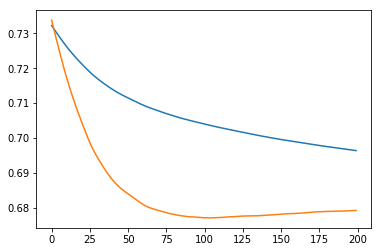

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

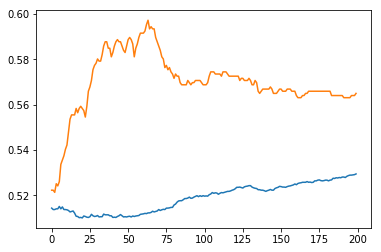

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

## 回測

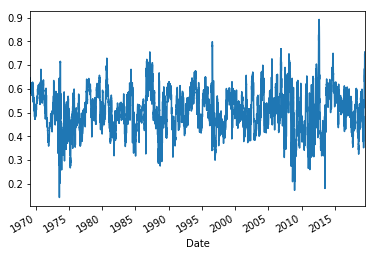

In [14]:
model.load_weights("nn.mdl")

ey = model.predict(dataset_scaled[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset.index)
ey.plot()

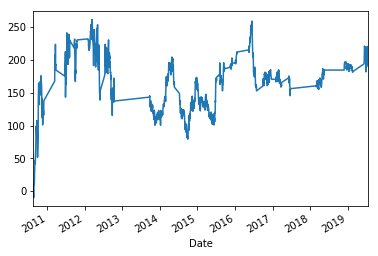

In [15]:
eq = twii[dataset.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0

eq = (gain[signal]['2010':]).cumsum()
eq.plot()

In [11]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2016':].sum()

51.0